In [1]:
### Adapted from: https://gitlab.com/dhirajhazra/simple-codes-in-cosmology

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = "18"

In [3]:
df=pd.read_csv(("https://lambda.gsfc.nasa.gov/data/cobe/firas/monopole_spec/firas_monopole_spec_v1.txt"), sep="\s+",skiprows=18,header=None) 

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 22 20:53:30 2020

@author: dhiraj
"""
# Constants that will be used by other codes
# see camb

class const():
    pi=3.1415926535897932384626433832795
    #speed of light
    C=2.99792458e8
    Ccm=2.99792458e10
    CKm=2.99792458e5
    #Gravitational constant
    G=6.6738e-11
    #Thomson scattering cross section
    sigma_thomson = 6.6524616e-29
    #Boltzmann constant
    k_B = 1.3806504e-23

    #Helium fraction
    yHe=0.24
    #Helium to hydrogen mass ratio
    mass_ratio_He_H = 3.9715

    #mass of proton
    m_p = 1.672621637e-27
    #mass of electron
    m_e = 9.10938215e-31
    #mass of hydrogen 
    m_H = 1.673575e-27

    #Gigayear to seconds
    Gyr=3.1556926e16
    #Megaparsec to meter
    MPc=3.085678e22
    #Megaparsec in second
    MPC_in_sec=MPc/C

    #Km in m
    Km=1000

    # meter to GeV^-1
    mGeVinv=5.07e15

    # Planck mass (1/sqrt(8 pi G)) to GeV
    MplGeV=2.4e18

    # Planck const J Hz^-1
    h=6.62607015e-34

    #MJy/sr in units of Kg/s^-2
    MJysrSI=1e-20


In [5]:
def bbspec(nu,T):   
    # Takes nu in units of 1/cm
    # Returns spectra in MJy/sr
    #converting to 1/s
    nuHz=nu*const.Ccm  
    x=const.h*nuHz/(const.k_B*T)
    ThInu=(2.0*const.h*(nuHz**3.0)/(const.C**2.0))/(np.exp(x)-1.0)
    #This is in Kg s^-2 units
    bbspec=ThInu/const.MJysrSI
    return bbspec

def chisq_simple(D,T,E):
    chisq_simple=np.sum(((D-T)/E)**2.0)
    return chisq_simple

def FIRAS_lnlike(params):
    T=params
    Th=bbspec(nu,T)
    FIRASchisq=chisq_simple(Inu,Th,dInu)
    lnlike=-0.5*FIRASchisq
    return lnlike

In [6]:
nu=df[0]
Inu=df[1]
dInu=df[3]/1000.0
T=2.7255
InuTh=bbspec(nu,T)

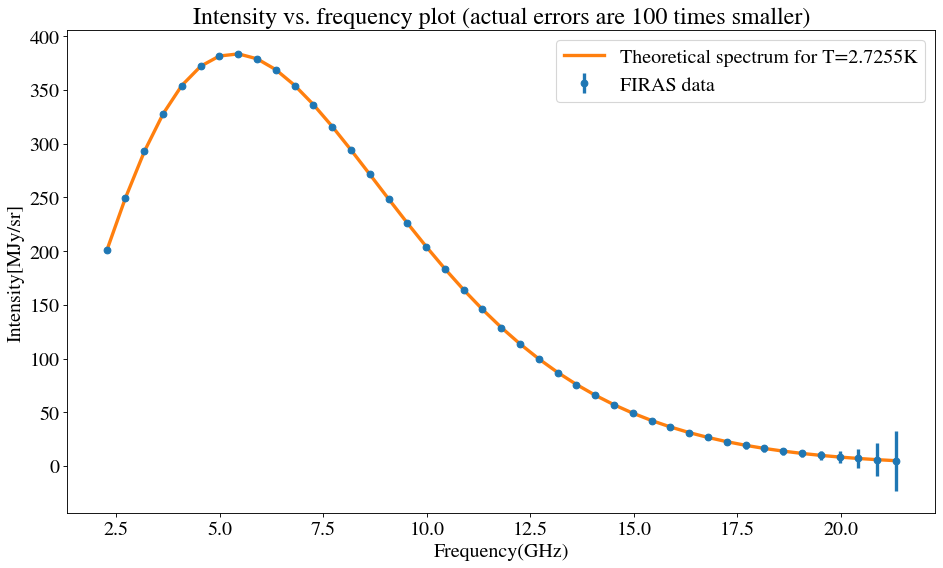

In [7]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(nu,Inu,yerr=dInu*100.0,fmt='o', linestyle="",
             label='FIRAS data',linewidth=3)
plt.plot(nu,InuTh,linewidth=3,label='Theoretical spectrum for T=2.7255K')
plt.xlabel("Frequency(GHz)")
plt.ylabel("Intensity[MJy/sr]")
plt.title('Intensity vs. frequency plot (actual errors are 100 times smaller)')
plt.legend()
plt.show()

In [12]:
TCMB_bestfit=2.7

import emcee

# initial points
ndim, nwalkers, nsteps = 1, 100, 500 
p0 = np.random.normal([TCMB_bestfit], 
                      [1e-1],
                      size=(nwalkers, ndim))
burn_in = 100 

In [9]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, FIRAS_lnlike, \
                                    pool=pool)
    sampler.run_mcmc(p0, nsteps, progress=True);

100%|██████████| 500/500 [00:28<00:00, 17.69it/s]


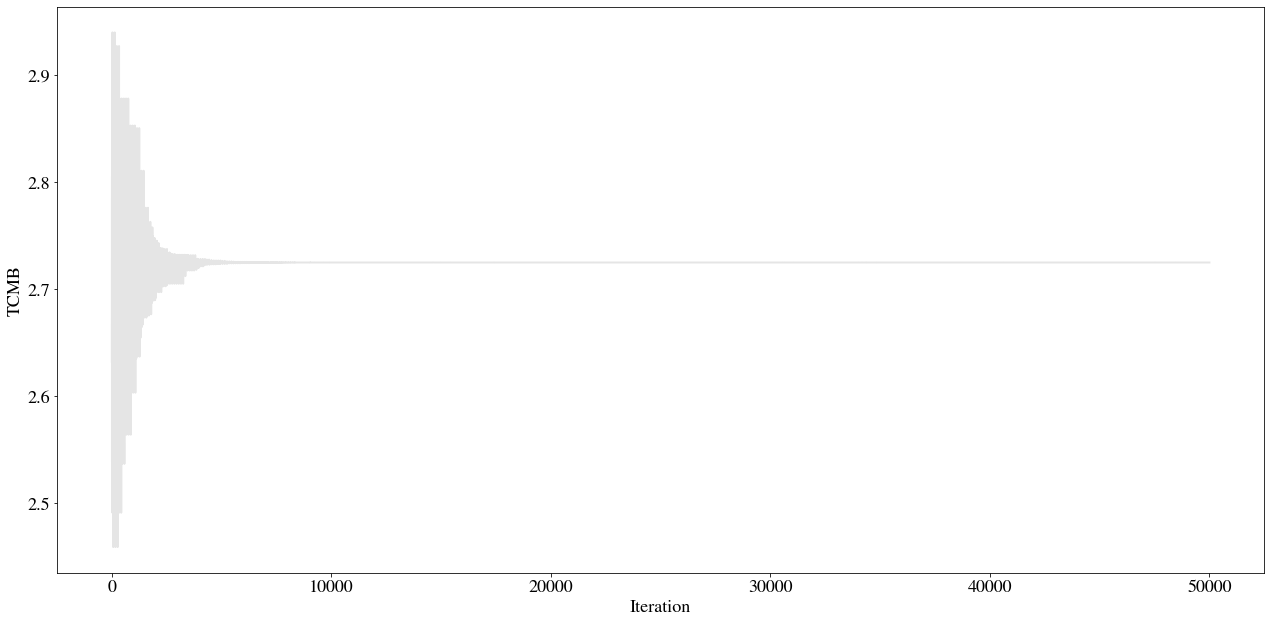

In [23]:
params = ['TCMB']
thin, discard = 0, 0
# plot traces of parameters
plt.figure(figsize=(18, 9))
for i in range(ndim):
    plt.plot(sampler.get_chain(flat=True)
    , color='black', alpha=0.1, lw=2)
    plt.xlabel('Iteration')
    plt.ylabel(params[i])
plt.tight_layout()

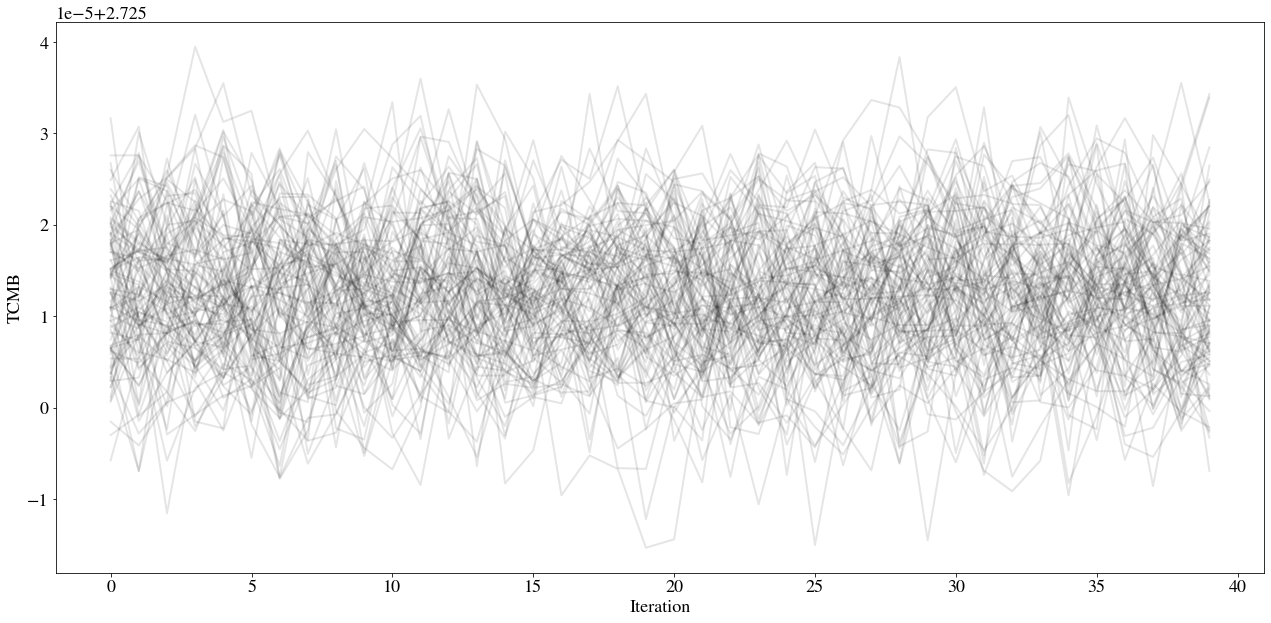

In [20]:
params = ['TCMB']
thin, discard = 10, 100
# plot traces of parameters
plt.figure(figsize=(18, 9))
for i in range(ndim):
    plt.plot(sampler.get_chain(thin=thin, discard=discard)[:, :, i]
    , color='black', alpha=0.1, lw=2)
    plt.xlabel('Iteration')
    plt.ylabel(params[i])
plt.tight_layout()

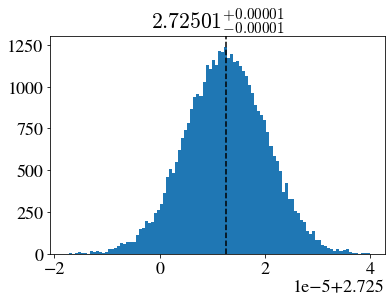

In [40]:
burn_in = 100
final_samples = sampler.get_chain(discard=burn_in, flat=True)
mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
q = np.diff(mcmc)


plt.figure()
plt.hist(final_samples, bins=100, histtype='stepfilled')
plt.axvline(x=np.median(final_samples), ls='--', color='k')


fmt = "{{0:{0}}}".format(".5f").format
title = r"${{{0}}}_{{-{1}}}^{{+{2}}}$"
title = title.format(fmt(mcmc[1]), fmt(q[0]), fmt(q[1]))
plt.title(title)
plt.show()